In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
salary_data = pd.read_csv('salary.csv')
salary_meta = pd.read_csv('Salary metadata.csv', sep=';')

In [3]:
salary_data.head(10)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
5,56000.0,1,0,0,1.19,1,0,1,1,1,0
6,61008.0,0,2,2,1.33,1,0,1,1,2,0
7,39986.0,0,2,0,0.99,1,0,1,1,4,0
8,36308.0,0,2,1,0.85,1,0,1,1,1,1
9,55000.0,0,0,0,1.23,1,0,1,1,1,1


In [4]:
display(salary_meta)

,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,Has other post-secondary qualification (0 = no...
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 ..."
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3..."


### We imported the salary csv that contained employee salaries, their experience, years worked, the rank they currently posses, their market value, degree, other qualifications they posses amongst other fields such as position, gender, field and their years absent. We were also given data on whether these columns we Continuous, Binrary or Categorical.

In [5]:
display(salary_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


None

### From this Data we were able to point out that there was a missing salary, as the salary column consisted of 513 rows whilst the majority of our columns contained 513. The decision was then to drop the salary row where the data was missiong, since this was only one value, we did not expect this value to affect our data in a major way and was not a key factor in reading our data.

In [6]:
salary_data = salary_data.dropna()

In [7]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        513 non-null int64
yearsworked    513 non-null int64
yearsrank      513 non-null int64
market         513 non-null float64
degree         513 non-null int64
otherqual      513 non-null int64
position       513 non-null int64
male           513 non-null int64
Field          513 non-null int64
yearsabs       513 non-null int64
dtypes: float64(2), int64(9)
memory usage: 48.1 KB


In [8]:
salary_data.columns

Index(['salary', 'exprior', 'yearsworked', 'yearsrank', 'market', 'degree',
       'otherqual', 'position', 'male', 'Field', 'yearsabs'],
      dtype='object')

### We had a look at the columns, This assisted with generating descriptive statistics and summarize our central tendency, since we had already drop the missing data in the Salary column, it made it easire to know we were working with all data points.

In [9]:
salary_data.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


### Finding the pairwise correlation of the data would then help us deduce which columns to use, by excluding catergorical data this minimised the coulmns we wanted to test on our null hypotheses. The correlation also assisted to find which columns had high measures of strength if we would have plotted them on a linear relationship type basis.

In [10]:
salary_data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


### From the correlation it was then evident that there were three columns that had a high correlation to our dependent variable which is the Salary. These columns were the exprience a person had working in a specific field, the years they have worked not taken into consideration the years absent from that field and the years ranked, which all possed high correlations. A new Dataframe called Salary_models which consisted of the four values we wanted to investigate was created and will be the dataframe used from this point onwards.

In [11]:
salary_models = salary_data[['salary', 'exprior', 'yearsworked', 'yearsrank']]

In [12]:
salary_models.head()

,salary,exprior,yearsworked,yearsrank
0,53000.0,0,0,0
1,58000.0,1,0,0
2,45500.0,0,0,0
3,35782.0,0,2,1
4,34731.0,0,2,2


### The Salary_models was used to plot pairwise relatiionships between the dataset, this was done to formulate a null hypthoses using two variables.We checked which variables had a strong linear relationship with the salary. From this we determined that the Salary had most relationship and correlation to the years worked.

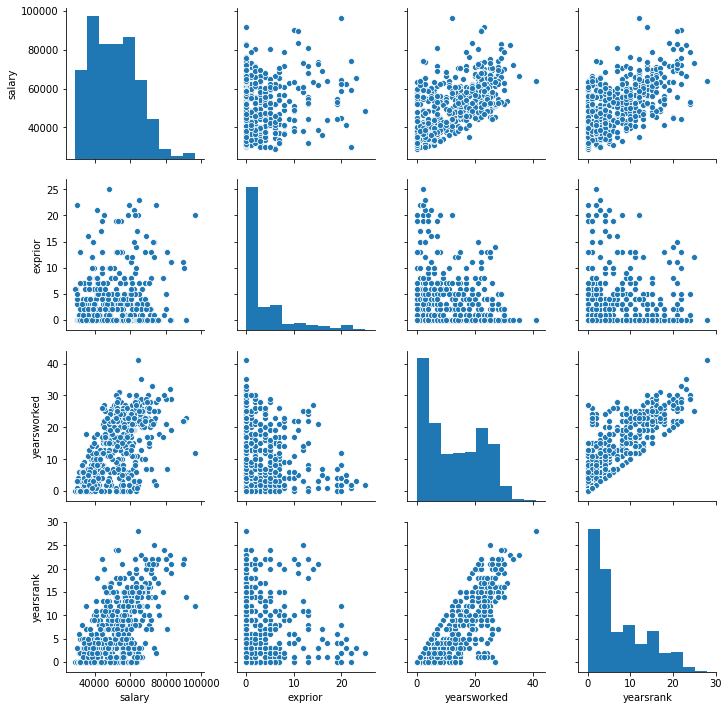

In [13]:
sns.pairplot(salary_models)
plt.show()

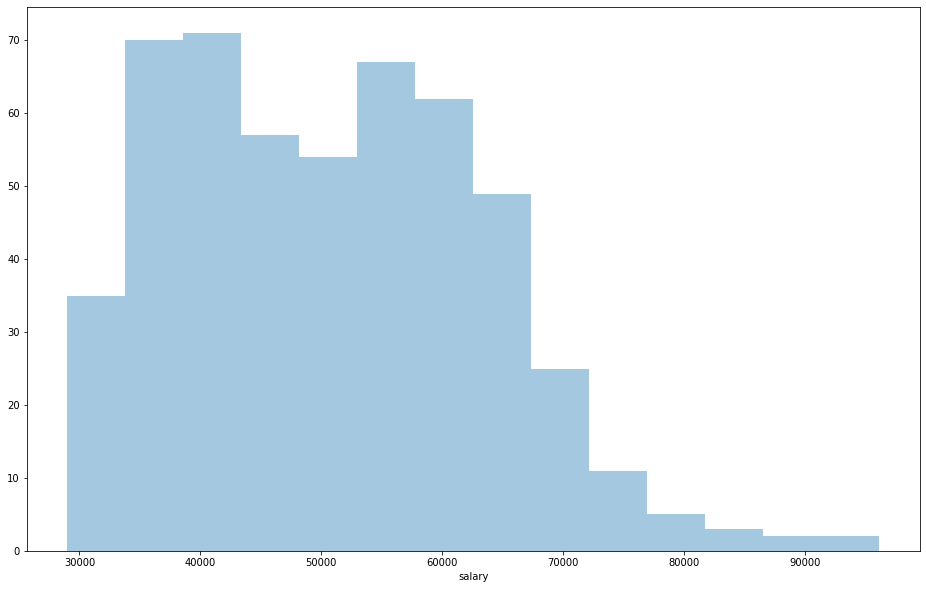

In [14]:
plt.figure(figsize=(16, 10))
ax = sns.distplot(salary_models['salary'], kde= False)

### A boxplot for the salary to find outliers, the qaurtile ranges and the minimum salary was processed for visual purposes against the years worked and the years rank respectively.

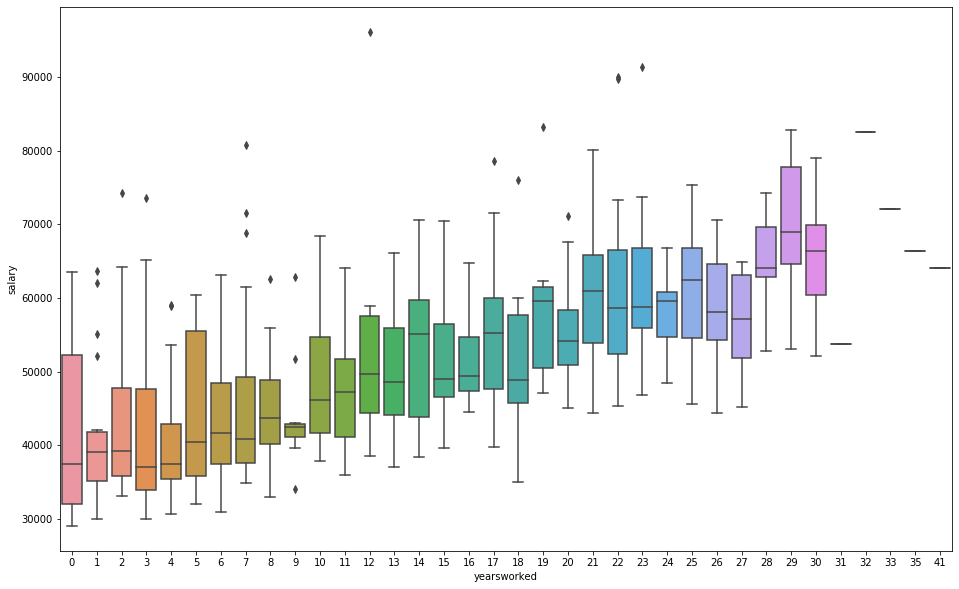

In [15]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(salary_models.yearsworked,salary_models.salary)

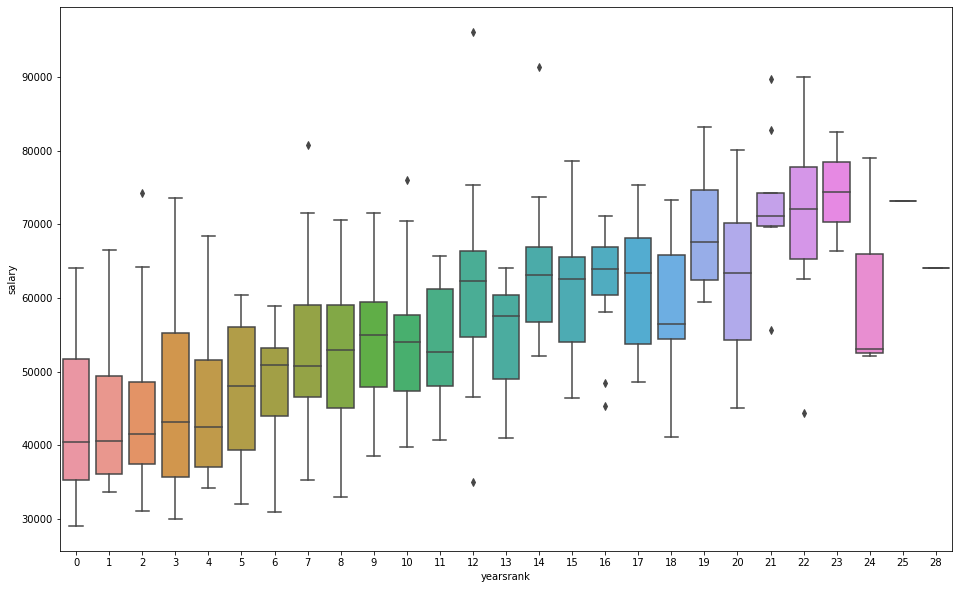

In [16]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(salary_models.yearsrank,salary_models.salary)

### A regplot to find the relationship between the Salary vs the yearsworked and rank was created to isolate and further provide evidence whether which plot data had a relationship and check the linear regression model fit. 

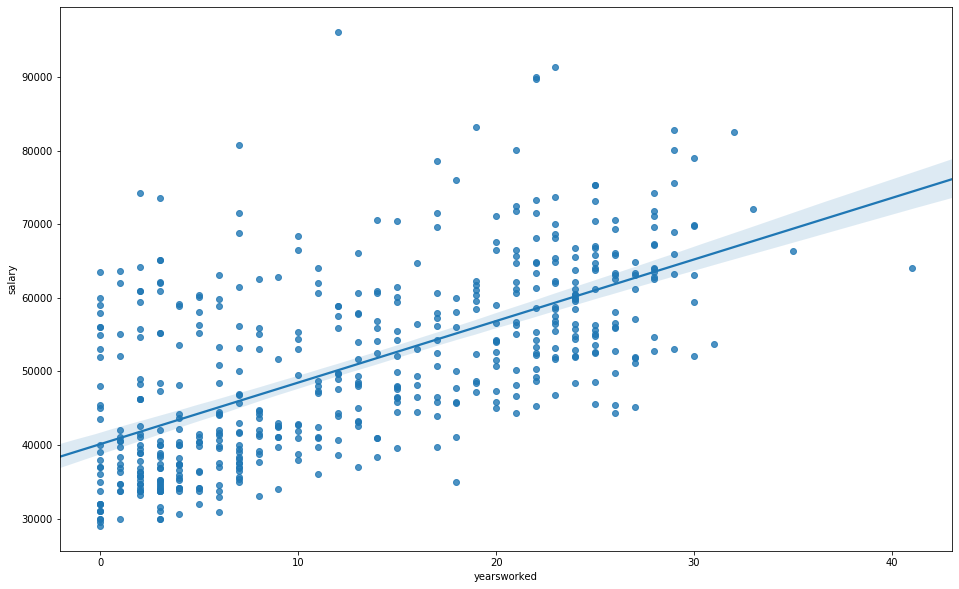

In [40]:
plt.figure(figsize=(16, 10))
ax = sns.regplot(salary_models.yearsworked,salary_models.salary)

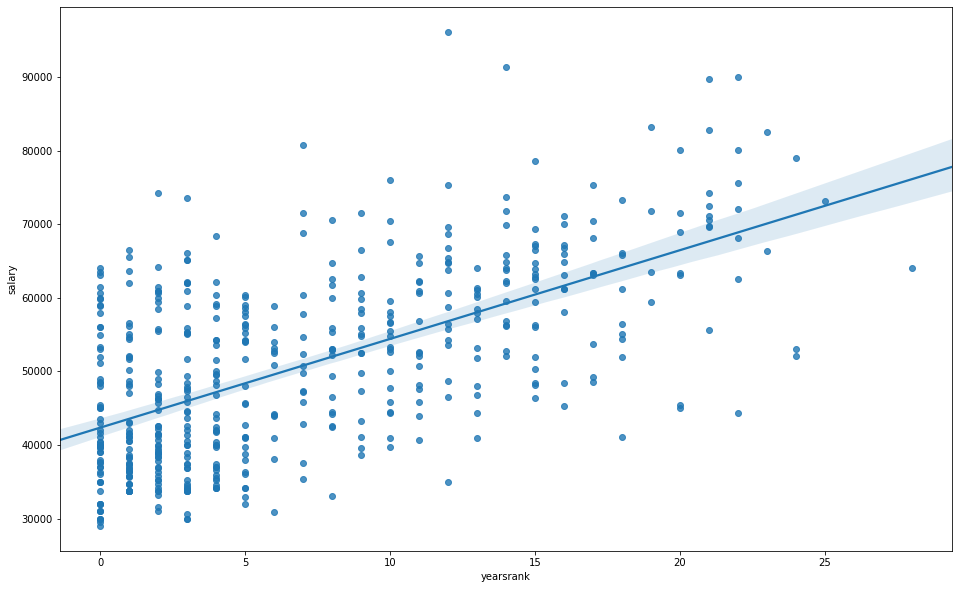

In [41]:
plt.figure(figsize=(16, 10))
ax = sns.regplot(salary_models.yearsrank,salary_models.salary)

In [19]:
from scipy import stats 
stats.pearsonr(salary_models.salary, salary_models.yearsworked)

(0.6235888657598045, 1.2873351342921916e-56)

### From the pearsonr we can see that salary and yearsworked are positively correlated as the correlation is 0.62 which does suggest there is a high level of correlation. Giving a glimpse on whether there is a  statistically signifcance between salary and years worked. 


### Once the two vairables we wanted to investigated were isolated, observed and further investigated in terms of finding a significance, correlation and linear relationship, checking for outliers and description of the graphs the null hypothesis that is then deduced which is that:
## There will be no significant prediction of salary by the years worked.

## Training Models

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Two varialbes that will be used for our training models, will be the Salary as the dependent variable and the years worked as the independent variable. We will split the data into a training and test set. This will help us create models using this, our data will be split 80/20 80 being the train size we will use to train the model, a random state was also used in order to recieve the same sample and results when we restart our kernel.

In [21]:
X = salary_models['yearsworked']
Y = salary_models['salary']

In [22]:
X_train,X_test,Y_train, Y_test = train_test_split(X, Y, train_size=0.8,random_state=10)

In [23]:
print(X_train.shape,X_test.shape,Y_train.shape, Y_test.shape)

(410,) (103,) (410,) (103,)


### A boxplot and regplot of the Salary vs the years worked of the training set is used to visualize if there are no major changes from the original data set.This will help us distinguish that the means have not drastically changed and the split did not have amjor influence on the chosen data.

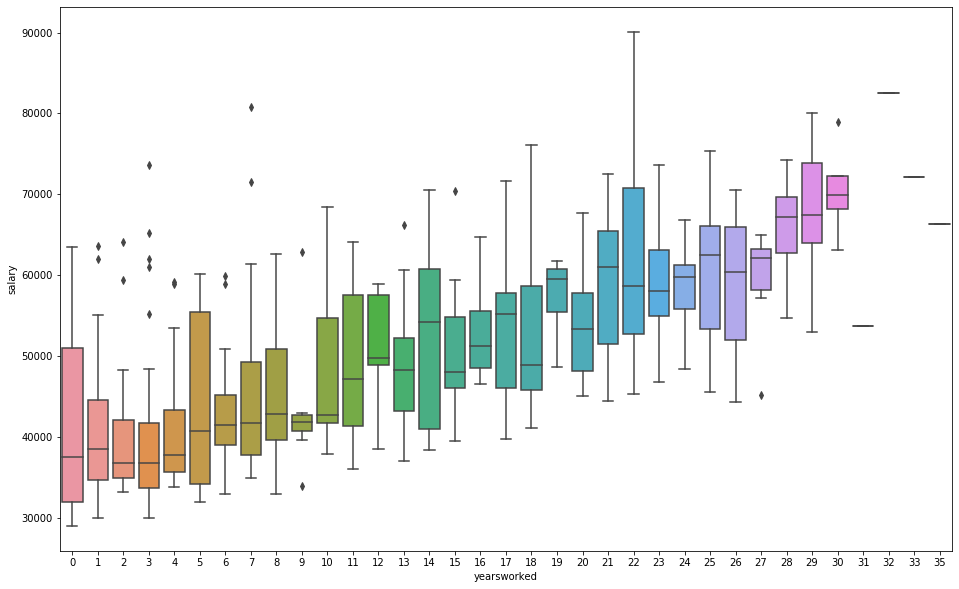

In [24]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x = X_train, y = Y_train)

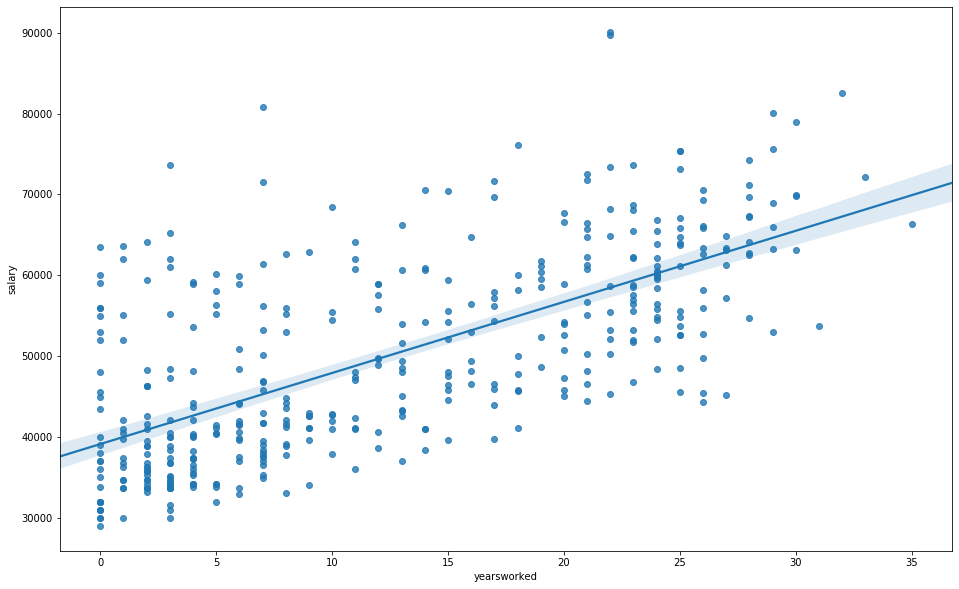

In [25]:
plt.figure(figsize=(16, 10))
sns.regplot(x= X_train,y= Y_train)

### We then used stats models to train the data, this allowed us to explore the data, perform statiscal tests and estimate predictors using our test data.

In [26]:
import statsmodels.api as sm

model = sm.OLS(Y_train, X_train)
results = model.fit()

#print (results.rsquared)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              1259.
Date:                Tue, 01 Oct 2019   Prob (F-statistic):                   6.81e-127
Time:                        16:20:54   Log-Likelihood:                         -4741.9
No. Observations:                 410   AIC:                                      9486.
Df Residuals:                     409   BIC:                                      9490.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2876.7336     81.086     35.478      0.000    2717.337    3036.131
==============================================================================
Omnibus:                       18.612   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.276
Skew:                          -0.055   Prob(JB):                       0.0160
Kurtosis:                       2.313   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
x_train = sm.add_constant(X_train.values)
model_cons = sm.OLS(Y_train, x_train)
results_cons = model_cons.fit()

#print (results.rsquared)
results_cons.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     329.6
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           2.04e-54
Time:                        16:20:55   Log-Likelihood:                -4326.1
No. Observations:                 410   AIC:                             8656.
Df Residuals:                     408   BIC:                             8664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.912e+04    753.736     51.898      0.000    3.76e+04    4.06e+04
x1           879.6787     48.454     18.155      0.000     784.428     974.930
==============================================================================
Omnibus:                       54.937   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.817
Skew:                           0.965   Prob(JB):                     9.35e-17
Kurtosis:                       3.772   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

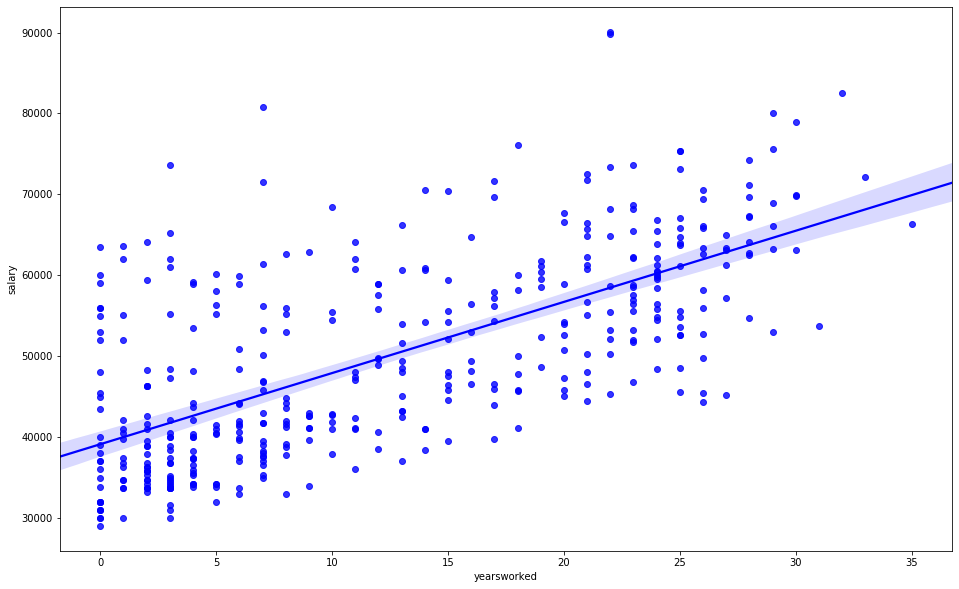

In [28]:
plt.figure(figsize=(16, 10))
ax = sns.regplot(X_train, Y_train, color='blue')

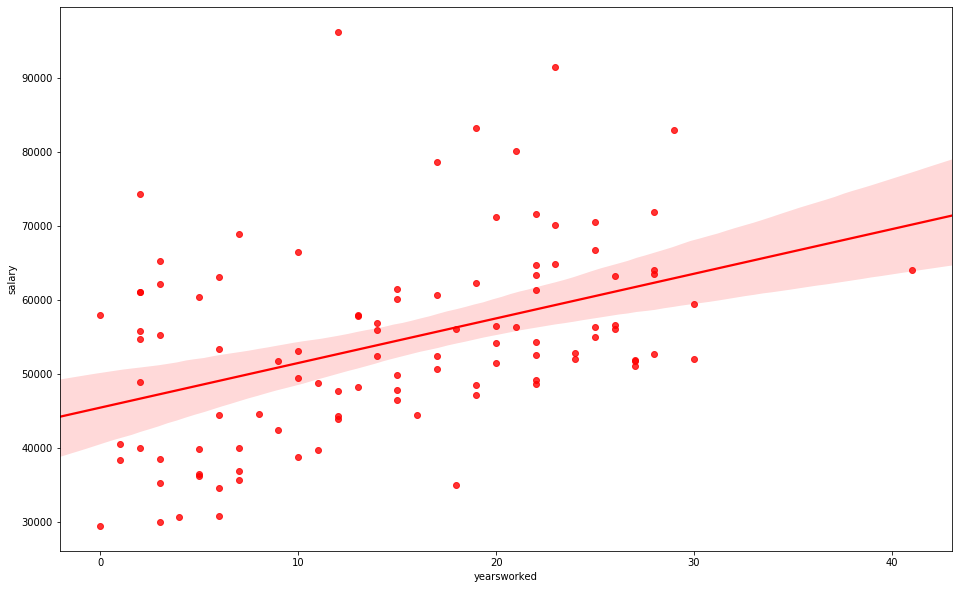

In [52]:
plt.figure(figsize=(16, 10))
ax = sns.regplot(X_test, Y_test, color='red')

In [59]:
print(results.predict(12))

[34520.80338878]


### Expected salary for someone with 12 years’ work experience is 34520.80

In [60]:
print(results.predict(80))

[230138.68925856]


### Expected salary for someone with 12 years’ work experience is 230138.68

In [61]:
from sklearn import metrics
predictions = results.predict(Y_test)
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 156325724.90538153
MSE: 2.5831615005601868e+16
RMSE: 160722167.12576354
